# 사이킷런을 이용하여 붓꽃(Iris) 데이터 품종 예측하기

꽃잎의 길이와 너비, 꽃받침의 길이와 너비를 기반으로 꽃의 품종을 예측한다.    

* Classification - [ Supervised learning ]

1.명확한 정답(레이블)이 주어진 데이터를 먼저 학습한다. (Train Data)  
2.미지의 정답을 예측한다. (Test Data)



* 사이킷런에서 사용할 모듈

sklearn.datasets - 사이킷런에서 자체적으로 제공하는 데이터 세트 (붓꽃 데이터 포함)  




sklearn.tree - 트리 기반 ML 알고리즘을 구현한 클래스의 모임  
    - 의사 결정 트리 알고리즘 구현한 DecisionTreeClassifier() 이용

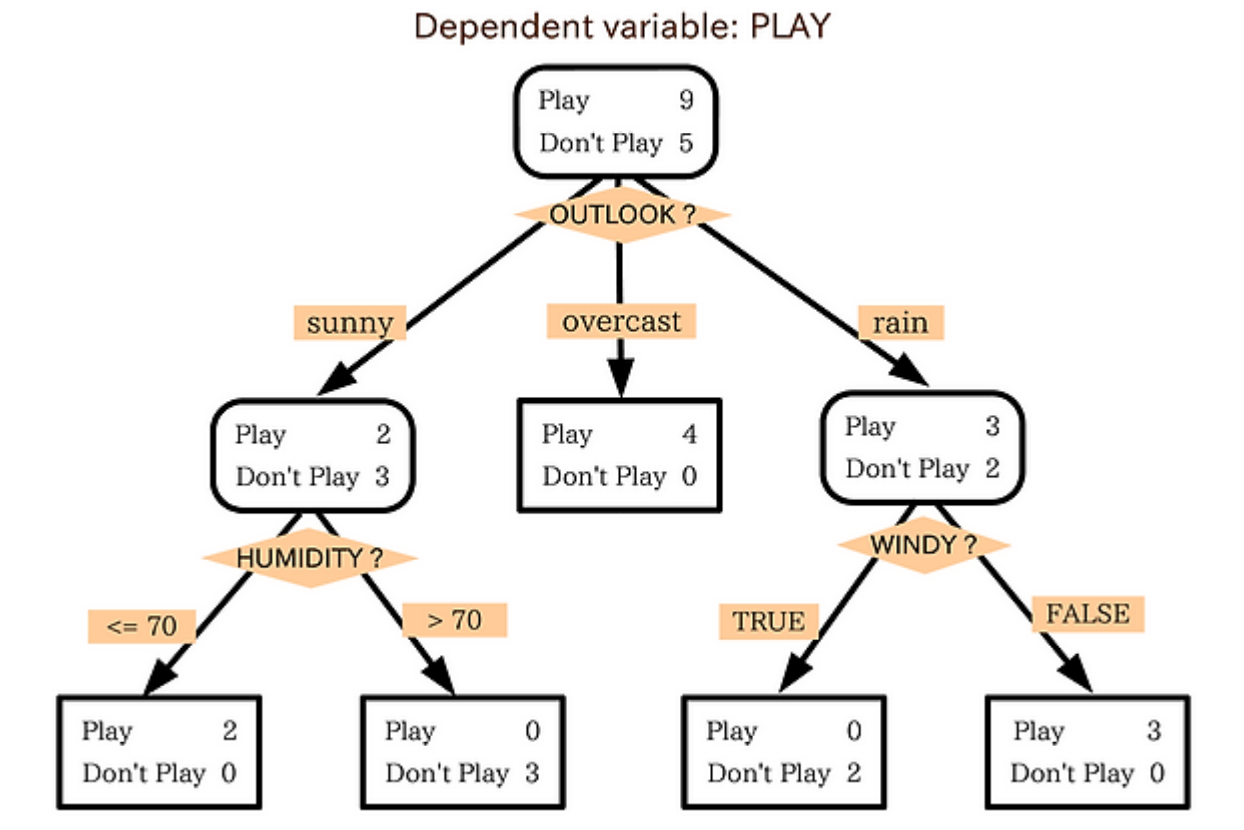

sklearn.model_selection - 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나  
                          최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임  
    - train_test_split() 함수를 이용하여 데이터 세트를 학습 데이터와 테스트 데이터로 분리  
  

* 결정 트리 학습법 : 데이터 마이닝에서 일반적으로 사용되는 방법론으로, 몇몇 입력 변수를 바탕으로 목표 변수의 값을 예측하는 모델을 생성하는 것을 목표로 한다.
  
* 하이퍼 파라미터 : 사람이 알고리즘에 직접 입력해주어야하는 파라미터를 말함. 어떤 값을 주느냐에 따라 성능이 달라짐



In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target

#target 값이 0이면 setosa, 1이면 versicolor, 2이면 virginica
print('iris target값:', iris_label)

print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
#train_test_split API가 전체 데이터를 테스트 데이터 20%, 학습 데이터 80%로 분할
#수행할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 random_state를 일정한 값으로 지정
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

fit(self, X, y[, sample_weight, …])

Build a decision tree classifier from the training set (X, y).

predict(self, X[, check_input])

Predict class or regression value for X.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

In [7]:
# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

In [8]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9333
